In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

x_csv_path = '../data/petrobras-indicadores-financeiros-raw.csv'
y_csv_path = '../data/petrobras-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

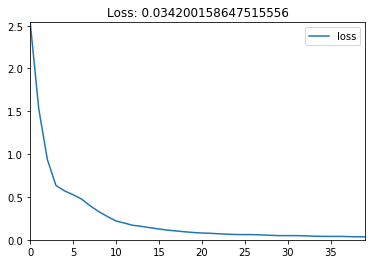

MSE of training: 0.033926434137604454
MSE of testing: 0.4308890104293823
    Prediction       Real    % error
3    17.317322  17.797074   2.695679
1    21.101011  15.919923  32.544686
9    14.558967  15.278651   4.710394
7    11.418253  15.161831  24.690804
10   16.514681  14.823267  11.410533
5    17.109175  14.739166  16.079670
4    22.539597  13.981354  61.211827
8    16.210100  13.124460  23.510607
0    14.907693  12.470606  19.542651
6    18.213375  12.205103  49.227536
2     9.082768   5.031833  80.506171


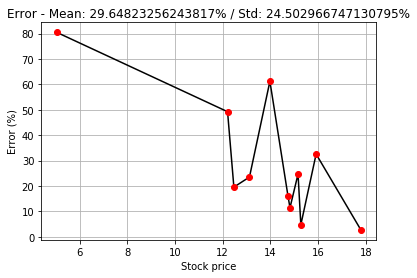

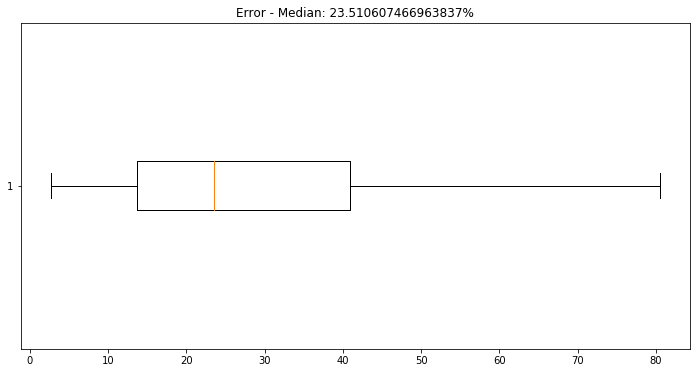

count    11.000000
mean     29.648233
std      24.502967
min       2.695679
25%      13.745102
50%      23.510607
75%      40.886111
max      80.506171
Name: % error, dtype: float64


In [2]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)